# Bellman Ford Algorithm
## 1. **Initialization**
- Set a very large value constant (e.g., $10^6$) to represent infinity.
- Create a vector `distanceVector` for all vertices:
    - If the vertex index equals the source node, set distance to 0.
    - Otherwise, set distance to infinity.
## 2. **Relaxation Loop**
- Repeat the following steps $(|V|-1)$ times, where $|V|$ is the number of vertices:
    - For each edge $(u, v, \text{weight})$ in the graph:
        - If the distance to node $u$ is infinity, skip this edge.
        - Otherwise, calculate: $\text{cost} = \text{distanceVector}[u] + \text{weight}$
        - If $\text{cost} < \text{distanceVector}[v]$, update $\text{distanceVector}[v]$ to cost.
## 3. **Result**
- After all relaxations, `distanceVector` contains the shortest distances from the source node to each vertex.
- Return `distanceVector`.
## Key Notes
- **Vertices Extraction:** The algorithm first gathers all vertices from the edges in the graph using the `getVertices()` method.
- **Edge Format:** Each edge in the graph is considered as a tuple $(u, v, \text{weight})$.
- **No Negative Cycle Detection:** The provided algorithm does not include a final check for negative cycles, which is standard in Bellman-Ford but omitted in this implementation.
### What is a negative cycle?
A negative cycle is a cycle in a graph where the sum of the edge weights is less than zero, meaning traversing the cycle decreases the total path cost.
### How to check for negative cycles?
If the `distanceVector` gets updated even after $(|V|-1)$ iterations, it is safe to say that the graph contains negative cycle(s).
***
## Initializing the graph

In [1]:
graph = [
    (3, 2, 6),
    (5, 3, 1),
    (0, 1, 5),
    (1, 5, -3),
    (1, 2, -2),
    (3, 4, -2),
    (2, 4, 3)
]

## Visualizing the graph

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjacency_matrix = [], isDirected = False, useAlphabets = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjacency_matrix) > 0:
            for i in range(len(adjacency_matrix)):
                for j in range(len(adjacency_matrix[i])):
                    if adjacency_matrix[i][j] <= 0: continue
                    if useAlphabets:
                        self.G.add_edge(chr(i+97), chr(j+97), weight = adjacency_matrix[i][j])
                    else: self.G.add_edge(i, j, weight = adjacency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000, k = 100) # k = optimal distance

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10 ** 4
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

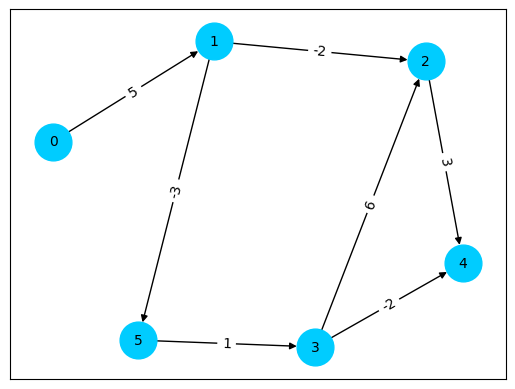

In [3]:
G = GraphVisualization(weighted = True, isDirected = True, edge_list = graph, useAlphabets = False)
G.visualize()

**Note:** $U \xrightarrow{-5} V$ is not the same as $V \xrightarrow{5} U$.
***
## Implementing the algorithm

In [4]:
from typing import List, Tuple

class Solution:
    def __init__(self, graph_:List[Tuple[int]]):
        self.graph = graph_
        self.vertices = self.getVertices()
    
    def getVertices(self):
        vertices = set()
        for edge in self.graph:
            u, v, weight = edge
            vertices.add(u)
            vertices.add(v)
        return vertices

    def bellmanFord(self, sourceNode_ = 0):
        VERY_LARGE_VALUE = 10 ** 6
        
        distanceVector = [0 if i == sourceNode_ else VERY_LARGE_VALUE for i in self.vertices]
        for i in range(len(self.vertices) - 1):
            for edge in self.graph:
                u, v, weight = edge
                if distanceVector[u] == VERY_LARGE_VALUE: # node not yet visited
                    continue
                cost = distanceVector[u] + weight
                if cost < distanceVector[v]:
                    distanceVector[v] = cost
        return distanceVector

## Driver code

In [5]:
sourceNode = 0
b = Solution(graph)
result = b.bellmanFord(sourceNode)

for i in range(len(result)):
    print(f"Minimum distance between {sourceNode} and {i} is {result[i]}")

Minimum distance between 0 and 0 is 0
Minimum distance between 0 and 1 is 5
Minimum distance between 0 and 2 is 3
Minimum distance between 0 and 3 is 3
Minimum distance between 0 and 4 is 1
Minimum distance between 0 and 5 is 2


***